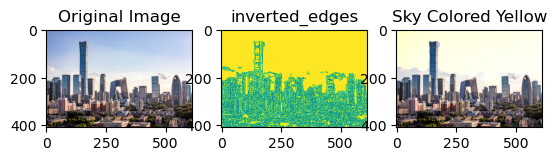

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('sky/8.jpeg') 

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the blue color range in RGB
lower_blue = np.array([0, 80, 120]) 
upper_blue = np.array([255, 255, 255]) 

# Create a mask for the aky color range in the RGB image
sky_mask = cv2.inRange(image_rgb, lower_blue, upper_blue)

# Find the edge and remove the edge from the sky
edges = cv2.Canny(image_rgb,40,50)
inverted_edges = cv2.bitwise_not(edges)
combined_mask = cv2.bitwise_and(sky_mask, inverted_edges)

# Define a kernel size
kernel_size = 50  # Example size, adjust as needed
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
combined_mask_morpho = cv2.morphologyEx(combined_mask, cv2.MORPH_OPEN, kernel)

# Create an image to apply the mask to
colored_sky = np.zeros_like(image_rgb)
colored_sky[np.where(combined_mask_morpho == 255)] = [255, 255, 0]  # Color the sky yellow in RGB format

# Merge the original RGB image with the colored sky
result_rgb = cv2.addWeighted(image_rgb, 1, colored_sky, 1, 0)


# Display the original and result images
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(inverted_edges)
plt.title('inverted_edges')

plt.subplot(1, 3, 3)
plt.imshow(result_rgb)
plt.title('Sky Colored Yellow')

plt.show()
